In [2]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargar recursos de NLTK (stopwords y tokenizador)
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Definir una función para preprocesar el texto
def preprocess_text(text):
    # Convertir el texto a minúsculas
    text = text.lower()
    
    # Eliminar caracteres especiales y números usando expresiones regulares
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenizar el texto en palabras
    words = word_tokenize(text)
    
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Unir las palabras preprocesadas en un solo string
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ezequielgarcia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/ezequielgarcia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('spam_ham_dataset.csv')


# Definir las características (X) y las etiquetas (y)
X = df['text']  # Características
y = df['label_num']  # Etiquetas


X = X.apply(preprocess_text)


#preprocessed_df = pd.DataFrame({'text': X, 'label_num': y})
#print(preprocessed_df.head(1))

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Puedes ajustar max_features según lo que consideres adecuado

# Ajustar y transformar el conjunto de entrenamiento
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transformar el conjunto de validación
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Transformar el conjunto de prueba
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Convertir las matrices dispersas a matrices densas
X_train_tfidf = X_train_tfidf.toarray()
X_val_tfidf = X_val_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

In [44]:
print(X_test_tfidf)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.28359091 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.05860321]]


In [45]:
X.shape
#X_test.shape


(5171,)

In [46]:
#import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Definir el modelo de la red neuronal
model = Sequential()
model.add(Dense(500, input_shape=(X_train_tfidf.shape[1],), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



/home/ezequielgarcia/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# Entrenar el modelo
history = model.fit(X_train_tfidf, y_train, epochs=35, batch_size=2500, validation_data=(X_val_tfidf, y_val))

Epoch 1/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - accuracy: 0.4969 - loss: 0.6901 - val_accuracy: 0.7253 - val_loss: 0.6666
Epoch 2/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.7071 - loss: 0.6635 - val_accuracy: 0.7253 - val_loss: 0.6310
Epoch 3/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.7080 - loss: 0.6283 - val_accuracy: 0.7253 - val_loss: 0.5830
Epoch 4/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7079 - loss: 0.5818 - val_accuracy: 0.7253 - val_loss: 0.5254
Epoch 5/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.7107 - loss: 0.5267 - val_accuracy: 0.7253 - val_loss: 0.4645
Epoch 6/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.7111 - loss: 0.4687 - val_accuracy: 0.7253 - val_loss: 0.4064
Epoch 7/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.7109 - loss: 0.4115 - val_accuracy: 0.7350 - val_loss: 0.3512
Epoch 8/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7250 - loss: 0.3537 - val_accuracy: 0.8143 - val_loss: 0.30

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


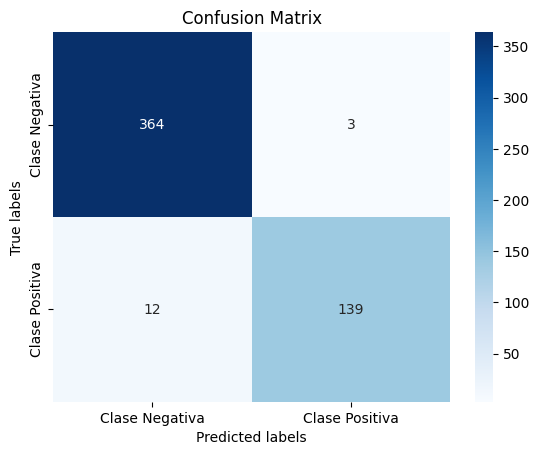

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  # Correct import statement

# Predecir en el conjunto de datos de prueba
y_pred_prob = model.predict(X_test_tfidf)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convertir las probabilidades en clases binarias (0 o 1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase Negativa', 'Clase Positiva'], yticklabels=['Clase Negativa', 'Clase Positiva'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [49]:
# Evaluación del modelo
loss, accuracy = model.evaluate(X_test_tfidf, y_test)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9776 - loss: 0.0937 
Pérdida en el conjunto de prueba: 0.2023194283246994
Precisión en el conjunto de prueba: 0.9710424542427063


In [50]:
import csv

resultados = []  # tu lista de resultados

with open('resultados_redN.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Columna1', 'Columna2', ...])  # Encabezados de las columnas si es necesario
    for resultado in resultados:
        writer.writerow(resultado)

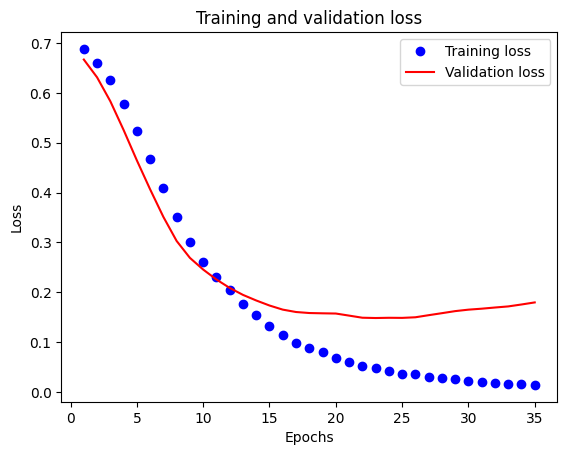

In [51]:
# overfitting: 
import matplotlib.pyplot as plt

def plot_loss(train_loss, val_loss):
    epochs = range(1, len(train_loss) + 1)
    plt.plot(epochs, train_loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()



train_loss = history.history['loss']
val_loss = history.history['val_loss']

plot_loss(train_loss, val_loss)


In [52]:

# Ejemplo de correo electrónico para probar el modelo
# Abre el archivo de texto en modo de lectura
with open('mail.txt', 'r') as archivo:
    # Lee el contenido del archivo y asigna a una variable
    contenido = archivo.read()
    email = contenido


# Preprocesar el correo electrónico
preprocessed_email = preprocess_text(email)

# Convertir el correo electrónico preprocesado en una representación TF-IDF
tfidf_email = tfidf_vectorizer.transform([preprocessed_email])

# Convertir la matriz dispersa a una matriz densa
tfidf_email = tfidf_email.toarray()

# Obtener la predicción del modelo
prediction = model.predict(tfidf_email)

# Imprimir la predicción
print("Predicción:", prediction)


if prediction > 0.75:
    print("El email es definitivamente spam")
elif prediction > 0.5:
    print("Es probable que el email sea spam")
elif prediction > 0.25:
    print("El email es probablemente no spam")
else:
    print("El email es definitivamente no spam")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicción: [[0.9836283]]
El email es definitivamente spam


179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


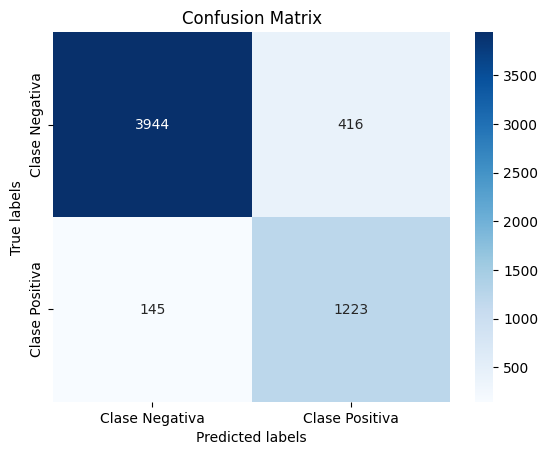

In [53]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

# Load data
data = pd.read_csv('emails.csv')
#X = data['text'][:1000]  # Limitar a los primeros 1000 correos electrónicos
#Y = data['spam'][:1000]  # También podrías querer limitar Y si es necesario

X = data['text']
Y = data['spam']

X = X.apply(preprocess_text)



    # Inicializar el vectorizador TF-IDF



# Transformar el conjunto de prueba
X_test_tfidf_2 = tfidf_vectorizer.transform(X)

# Convertir las matrices dispersas a matrices densas
X_test_tfidf_2 = X_test_tfidf_2.toarray()

#############################################################################################

# Predecir en el conjunto de datos de prueba
y_pred_prob = model.predict(X_test_tfidf_2)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convertir las probabilidades en clases binarias (0 o 1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(Y, y_pred)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase Negativa', 'Clase Positiva'], yticklabels=['Clase Negativa', 'Clase Positiva'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()




In [54]:
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
print("Accuracy:", accuracy)


Accuracy: 0.9020600558659218


In [ ]:
#ENTRENAMIENTO 2

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('spam_or_not_spam.csv')


# Definir las características (X) y las etiquetas (y)
X = df['email']  # Características
y = df['label']  # Etiquetas


X = X.apply(preprocess_text)


#preprocessed_df = pd.DataFrame({'text': X, 'label_num': y})
#print(preprocessed_df.head(1))

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train_3, X_val_test_3, y_train_3, y_val_test_3 = train_test_split(X, y, test_size=0.2, random_state=42)
#X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_val_test_3, y_val_test_3, test_size=0.5, random_state=42)

# Inicializar el vectorizador TF-IDF
#tfidf_vectorizer = TfidfVectorizer(max_features=3500)  # Puedes ajustar max_features según lo que consideres adecuado

# Ajustar y transformar el conjunto de entrenamiento
X_train_tfidf_3 = tfidf_vectorizer.fit_transform(X_train_3)

# Transformar el conjunto de validación
X_val_tfidf_3 = tfidf_vectorizer.transform(X_val_test_3)

# Transformar el conjunto de prueba
X_test_tfidf_3 = tfidf_vectorizer.transform(X_test_3)

# Convertir las matrices dispersas a matrices densas
X_train_tfidf_3 = X_train_tfidf_3.toarray()
X_val_tfidf_3 = X_val_tfidf_3.toarray()
X_test_tfidf_3 = X_test_tfidf_3.toarray()